
# Introduction
## What is a Probability Distribution?
A probability distribution is a statistical function that describes the likelihood of obtaining all possible values that a random variable, or measure, can take. 

Examples of such random variables include:
* a person's height
* the time between calls in a call centre
* the number of workplace accidents in a month
* the number of students that pass a test
* the proportion of visitors that click through a website
* etc.

If you know how your data is distributed, you can predict the likelihood of a certain event happening, or of a certain outcome. There are many kinds of distributions.  These can be split, broadly, between those based on continuous data, and those based on discrete data.  In fact each of the above examples are modelled with a different distribution.

Refs:  
*https://www.linkedin.com/pulse/what-do-we-use-probability-distributions-naman-bhandari/*  
*https://en.wikipedia.org/wiki/List_of_probability_distributions*  
*https://towardsdatascience.com/6-useful-probability-distributions-with-applications-to-data-science-problems-2c0bee7cef28*


# The Geometric Distribution
The Geometric Distribution is a discrete probability distribution defined as:  
**The probability distribution of the number of Bernoulli trials, X, needed to get one success, supported on the set 
{1,2,3,…}**  
  
It can also be defined as:  
**The probability distribution of the number of failures, Y = X − 1, before the first success, supported on the set 
{0,1,2,…}**  

... which is basically the same thing.

## Examples
A Bernoulli trial is a trial that has two possible outcomes: "success" and "failure".  So:
* You decide to roll a die repeatedly until a "3" is obtained. The probability p of getting a 3 is 1/6.  The random variable, X, being the number of throws, can take on a value of 1, 2, 3, ...., until the first success is obtained i.e. the first time a "3" is rolled. In this case X, the number of throws before a 3 is thrown, is a geometric distribution with p = 1/6.
* If you’re in sales, and there's a probability of 0.1 of a sales pitch ending in a sale, the Geometric distribution can be used to model how many pitches it will take to end up making a sale.

## Why "Geometric"?
Thinking about the above examples... with each roll of the dice, or with each sales pitch, you are one step or *trial* closer to achieving the desired result.  You get closer by a fixed ratio each time, based on the probability of success. However it remains possible, albeit increasingly unlikely, that you will never get to success.  This kind of relationship can be modelled & visualised using geometry, and hence is known as a *geometric progression*:

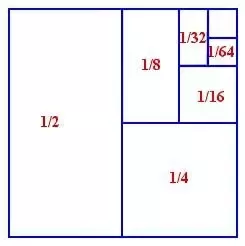

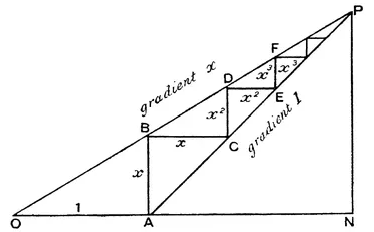


## Formulae
- The Probability Mass Function (pmf) i.e. P(X=x) the probability of trial x yeilding the successful outcome is given by:  

$$
(1 - p){^{x-1}}p
$$


- The Cumulative Distribution Function (pdf) i.e. P(X <= x) the probability of success being reached by the time we've conducted the x-th trial is given by:  

$$
1 - (1 - p)^x
$$

 
  
- The mean of the distribution, is also the expected value of the distribution i.e. E(X) is given by:  

$$
\frac{1}{p}
$$

Where ***p*** is the probability of success for a single trial, and ***x*** is the xth trial, ranging from 1 onwards.  

Refs:  
*https://en.wikipedia.org/wiki/Geometric_distribution*  
*https://www.statisticshowto.com/geometric-distribution-real-life-examples/*  
*https://www.cuemath.com/geometric-distribution-formula/*  

# Some Python...
The following code creates a geometric distribution based on the sales pitches example above, with probability of an individual pitch leading to a sale being 0.1, for 1 to 50 pitches (trials). We plot its Probability Mass Function and Cumulative Distribution Frequency.

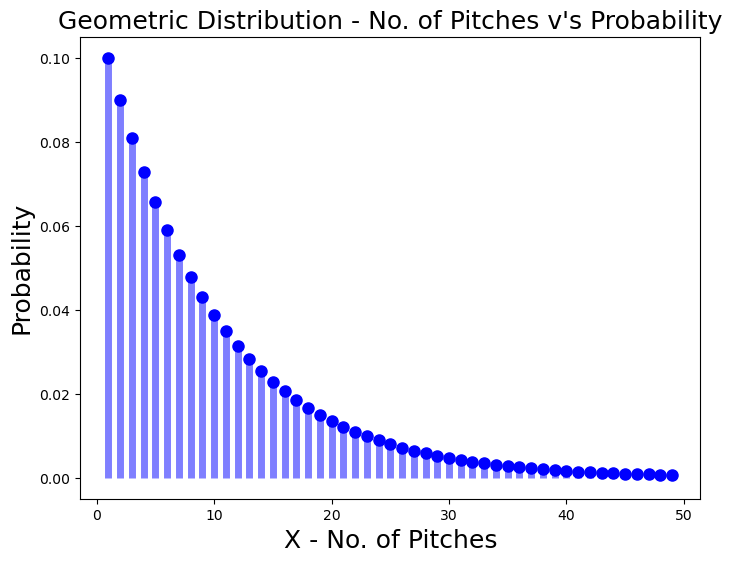

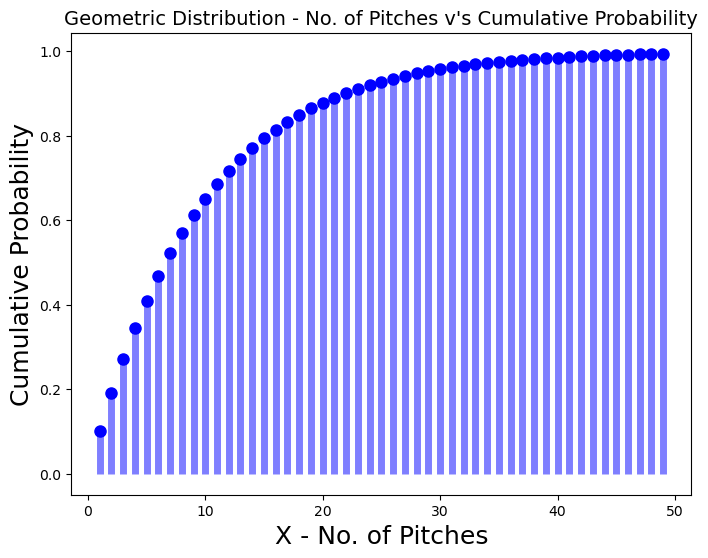

In [61]:
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np
#
# X = Discrete random variable representing number of throws
# p = Probability of the perfect throw
#
X = np.arange(1,50,1)
p = 0.1
#
# Calculate geometric probability distribution
#
geom_pmf = geom.pmf(X, p)
geom_cdf = geom.cdf(X, p)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_pmf, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Pitches", fontsize="18")
plt.title("Geometric Distribution - No. of Pitches v's Probability", fontsize="18")
_ = ax.vlines(X, 0, geom_pmf, colors='b', lw=5, alpha=0.5)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_cdf, 'bo', ms=8, label='geom cdf')
plt.ylabel("Cumulative Probability", fontsize="18")
plt.xlabel("X - No. of Pitches", fontsize="18")
plt.title("Geometric Distribution - No. of Pitches v's Cumulative Probability", fontsize="14")
_ = ax.vlines(X, 0, geom_cdf, colors='b', lw=5, alpha=0.5)


# Hypothesis Testing with Geometric distributions
## Scenario 
A salesperson claims that the chances of them making a sale when they do their super-dooper-wunder-pitch is 1 in 8.  This sounds impressive.

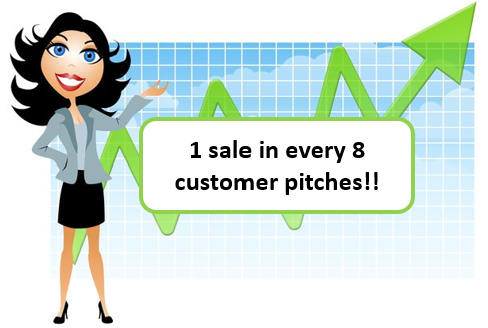

The CEO decides to put this to the test, suspecting that this sounds too good to be true.  She attends each sales pitch that the salesperson makes, and waits to see how many pitches it takes until the salesperson makes their next sale.

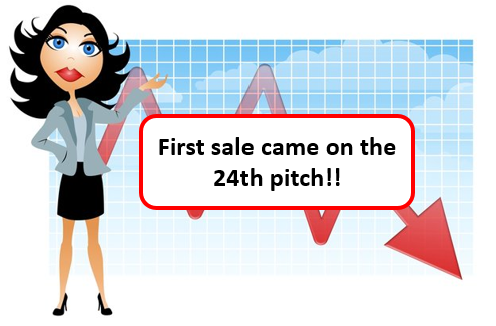

She observes that it wasn't until the 24th sales pitch that the salesperson made their next sale.  Is there evidence to suggest that the salesperson has been overstating their success rate?

### Null Hypothesis
Probability of making a sale is 1/8

### Alternate Hypothesis
Probability of making a sale is *less than* 1/8

### Significance level
Alpha = 0.05

### Calculation
Recalling that the Cumulative Distribution Function (pdf) i.e. P(X <= x) the probability of success being reached by the time we've conducted the x-th trial is given by:  

$$
1 - (1 - p)^x
$$

So the probability of (x - 1) failures before the first success at the xth trial is given as:

$$
1 - (1 - (1 - p)^{x-1})  
$$

$$
(1 - p)^{x-1}
$$

In our case:

$$
= (\frac{7}{8})^{23}
$$

$$
= 0.0464
$$


So the probability of observing this result in a geometric distribution where the chance of success is 1/8 is 0.0464.  
**As 0.0464 < 0.05 we reject the null hypothesis and conclude there is evidence that the salesperson is overstating their sale-success rate.**


# Expected Value of a Geometric Distribution
Recall that:
The mean of the distribution, is also the expected value of the distribution i.e. E(X) is given by:  

$$
\frac{1}{p}
$$

In the salesperson example above:

$$
\frac{1}{\frac{1}{8}}
$$

$$
= 8
$$

This tells us that, on everage, we expect a successful outcome after around 8 sales pitches.

# Python again...
The next piece of code generates a number of random geometric distributions with p = 0.125 i.e. 1/8, takes their mean, and then plots the distribution of that mean.




Test Statistic:	 12.678688546236199 
p-value:	 0.0017654595166270938


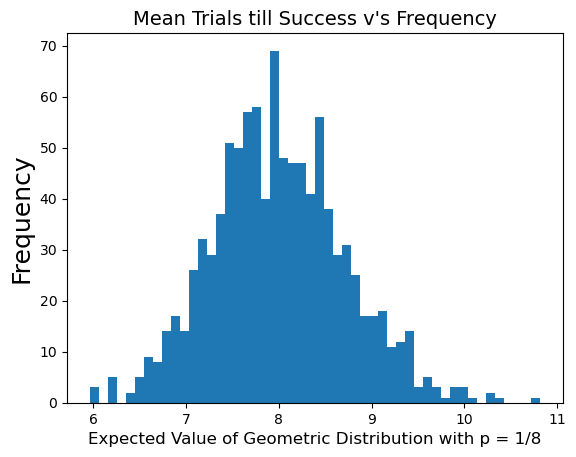

In [66]:
means = [0 for element in range(1000)]
for i in range(1000) :
    z = np.random.geometric(p=0.125, size=100)
    means[i] += np.mean(z)
_ = plt.hist(means,50)
plt.ylabel("Frequency", fontsize="18")
plt.xlabel("Expected Value of Geometric Distribution with p = 1/8", fontsize="12")
plt.title("Mean Trials till Success v's Frequency", fontsize="14")
_ = plt.show

# Is this mean distributed normally?
from scipy.stats import normaltest
stat, pval = normaltest(means)
print ("\nTest Statistic:\t", stat,"\np-value:\t",pval)

## That's interesting isn't it?
In our scenario, when the salesperson failed to make a sale until their 24th pitch, that looks like a very very unexpected result.  None of our random samples from the geometric distribution achieved the same result. Which begs a question for hypothesis testing in the salesperson scenario: given our observed value of a first successful pitch on the 24th occasion, which was only just statistically significant, would it be more powerful in this scenario to perform a t-test?  A result of 24 here would be far off in the right hand tail....?  Is hypothesis testing with geometric distributions subject to Type II errors?  Or... did I make a mistake?! <span style="color:red"> [please see **ADDENDUM** below] </span>


# And finally: Did You Know?
The most common distributions are actually related to each other in various ways!

- The geometric probability distribution is the discrete analog of the exponential probability distribution.  With the **geometric** distribution we're modelling the number of trials before we reach success, whereas with the **exponential** distribution we're modelling how long we need to wait before an event occurs.
- The geometric and binomial distributions are also closely related, both being based on Bernoulli trials.  Whereas the **geometric** distribution models the number of trials to reach success, the **binomial** distribution models the chance of sucess with a fixed number of trials.  

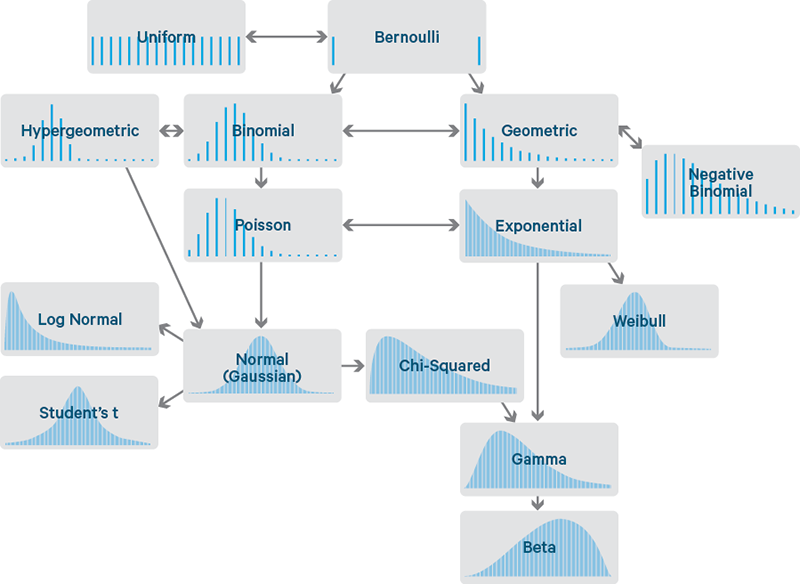

Refs  
*https://www.kaggle.com/code/hamelg/python-for-data-22-probability-distributions*  
*https://www.linkedin.com/pulse/what-do-we-use-probability-distributions-naman-bhandari/*

# Summary
- The Geometric distribution is a discrete distribution
- It is used to model the number of trials it takes to achieve a successful outcome in a trial where there is a known probability of success for a single trial
- It is defined by the probability of success in an individual trial
- The more trials you have, the closer you are to reaching success
- It is similar to the exponential distribution, which is a continuous distribution that models how long we need to wait before the successful event occurs.

Examples include:  
- predicting the number of cards you are likley to drawing before getting an Ace
- predicting how many days you'll go without an accident
- predicting how many promotional items you'll need top purchase to win a prize

# <span style="color:red">ADDENDUM</span>
During discussion in class, the histogram plot above is a plot of the mean, and as expected with the central limit theorem, it converges on the expected mean of 8.  The interpretation I made was not correct. My intention was to look at the distribution of x, where x is the trial that yeilded the successful result. I was expecting to see something that looks positively skewed, perhaps like the Poission distribution in the image above. My layperson reasoning was:  There should be a peak at 8, because 1/8 is the probability of success.  There should be a long tail to the right because, in theory, you could go a long time without getting the success result (+ve infinity).  There cannot be a long tail on the left hand side because we start at zero, not at -ve infinity.